# Exercise

Modify the code as per the below instructions
- Use a different dataset.
- Increase the number of hidden layers.
- Increase the number of neurons in each hidden layers.
- Compare the results of the following optimizers - SGD, Momentum, RMSProp, Adam and plot the results.


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, datasets, utils, optimizers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the CIFAR-10 dataset
(cifar_train_data, cifar_train_labels), (cifar_test_data, cifar_test_labels) = datasets.cifar10.load_data()

In [ ]:
# Data Pre-processing

# Normalize the data
cifar_train_data = cifar_train_data.astype('float32') / 255.0
cifar_test_data = cifar_test_data.astype('float32') / 255.0

# Convert class vectors to binary class matrices
cifar_train_labels = utils.to_categorical(cifar_train_labels, 10)
cifar_test_labels = utils.to_categorical(cifar_test_labels, 10)


print('shape of input data')
print(cifar_train_data.shape, cifar_train_labels.shape, cifar_test_data.shape, cifar_test_labels.shape)

shape of input data
(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [ ]:
# Define the DNN model
def create_dnn_model(optimizer_name='sgd'):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(32, 32, 3)))
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dense(150, activation='relu'))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer_name,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define the different optimizers
optimizers_dict = {
    'SGD': optimizers.SGD(learning_rate=0.01),
    'Momentum': optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'RMSProp': optimizers.RMSprop(learning_rate=0.001),
    'Adam': optimizers.Adam(learning_rate=0.001)
}


In [ ]:
# Train models with different optimizers
history_dict = {}
for opt_name, opt in optimizers_dict.items():
    print('\n')
    print(f'Training with {opt_name} optimizer')
    model = create_dnn_model(optimizer_name=opt)

    history = model.fit(cifar_train_data, cifar_train_labels,
                        epochs=25, batch_size=64, validation_split=0.1, verbose=2)
    history_dict[opt_name] = history
    test_loss, test_accuracy = model.evaluate(cifar_test_data, cifar_test_labels, verbose=0)
    print(f'{opt_name} Testing loss: {test_loss:.4f}, Testing accuracy: {test_accuracy:.4f}')



Training with SGD optimizer
Epoch 1/25
704/704 - 13s - loss: 2.0375 - accuracy: 0.2634 - val_loss: 2.3183 - val_accuracy: 0.2232 - 13s/epoch - 18ms/step
Epoch 2/25
704/704 - 8s - loss: 1.8205 - accuracy: 0.3473 - val_loss: 1.9045 - val_accuracy: 0.2988 - 8s/epoch - 11ms/step
Epoch 3/25
704/704 - 7s - loss: 1.7303 - accuracy: 0.3838 - val_loss: 2.0073 - val_accuracy: 0.2976 - 7s/epoch - 10ms/step
Epoch 4/25
704/704 - 6s - loss: 1.6685 - accuracy: 0.4058 - val_loss: 1.8759 - val_accuracy: 0.3338 - 6s/epoch - 9ms/step
Epoch 5/25
704/704 - 7s - loss: 1.6210 - accuracy: 0.4236 - val_loss: 2.2824 - val_accuracy: 0.2596 - 7s/epoch - 10ms/step
Epoch 6/25
704/704 - 6s - loss: 1.5843 - accuracy: 0.4383 - val_loss: 1.6280 - val_accuracy: 0.4258 - 6s/epoch - 8ms/step
Epoch 7/25
704/704 - 7s - loss: 1.5515 - accuracy: 0.4496 - val_loss: 1.8719 - val_accuracy: 0.3426 - 7s/epoch - 10ms/step
Epoch 8/25
704/704 - 6s - loss: 1.5212 - accuracy: 0.4601 - val_loss: 1.8000 - val_accuracy: 0.3586 - 6s/epoc

In [ ]:
# Common Model Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_15 (Dense)            (None, 200)               614600    
                                                                 
 dense_16 (Dense)            (None, 150)               30150     
                                                                 
 dense_17 (Dense)            (None, 100)               15100     
                                                                 
 dense_18 (Dense)            (None, 50)                5050      
                                                                 
 dense_19 (Dense)            (None, 10)                510       
                                                                 
Total params: 665410 (2.54 MB)
Trainable params: 66541

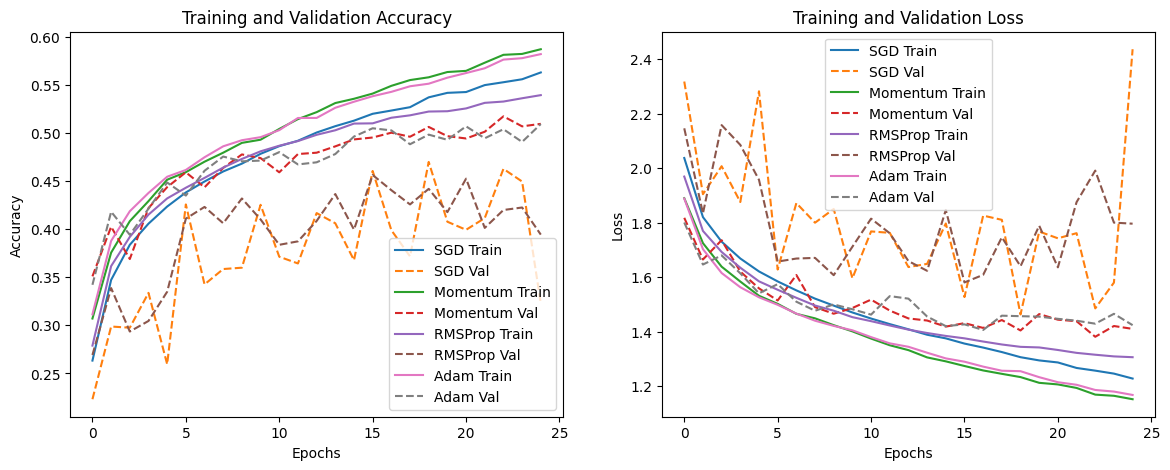

In [ ]:
# Plot training accuracy and loss for all optimizers
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
for opt_name, history in history_dict.items():
    plt.plot(history.history['accuracy'], label=f'{opt_name} Train')
    plt.plot(history.history['val_accuracy'], label=f'{opt_name} Val', linestyle='--')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
for opt_name, history in history_dict.items():
    plt.plot(history.history['loss'], label=f'{opt_name} Train')
    plt.plot(history.history['val_loss'], label=f'{opt_name} Val', linestyle='--')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()